In [1]:
# importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# getting the data.
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# dropping the "Unnamed: 0" column which just numbers the entries.
df= df.drop(columns=["Unnamed: 0"])

In [5]:
# getting the basic information about the columns and their data-type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [35]:
# checking for null values.
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [36]:
# checking for duplicates.
df.duplicated().value_counts()

False    200
dtype: int64

In [6]:
# Let's look at some of the properties of our dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


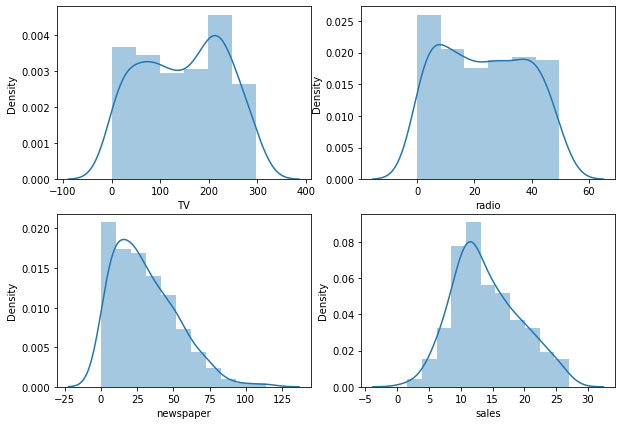

In [7]:
# Let's see the distribution plot of our columns.
plt.figure(figsize=(10,7))
plotnumber=1
for column in df:
    if plotnumber<=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

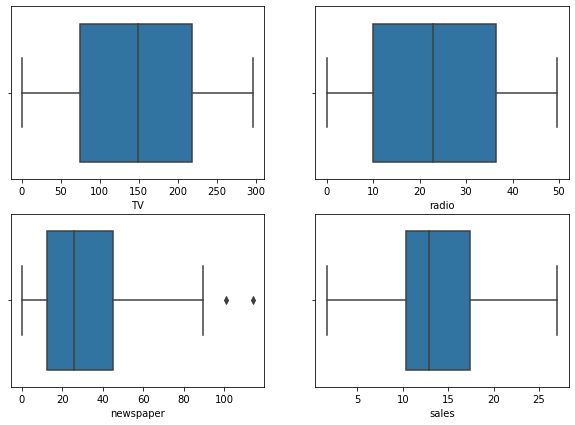

In [8]:
# Let's see the box-plot of our columns.
plt.figure(figsize=(10,7))
plotnumber=1
for column in df:
    if plotnumber<=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

# "newspaper" column seems to be having some outliers.

In [9]:
# Let's remove the outliers using IQR method.
percentile25 = df['newspaper'].quantile(0.25)
percentile75 = df['newspaper'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['newspaper'] < upper_limit]
df = df[df['newspaper'] > lower_limit]

<AxesSubplot:xlabel='newspaper'>

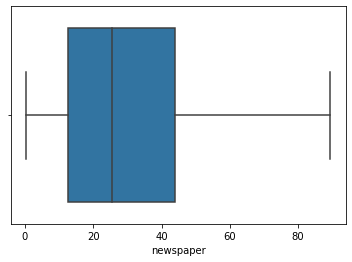

In [10]:
# Box-plot of "newspaper" column after removal of outliers.
sns.boxplot(df["newspaper"])

<AxesSubplot:xlabel='TV', ylabel='sales'>

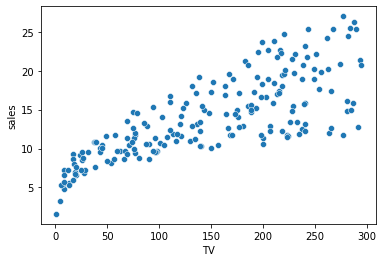

In [11]:
# Let's see the scatter-plot of "TV" column vs the target variable.
sns.scatterplot(x=df["TV"],y=df["sales"])

# There seems to be a linear relation between them.

<AxesSubplot:xlabel='radio', ylabel='sales'>

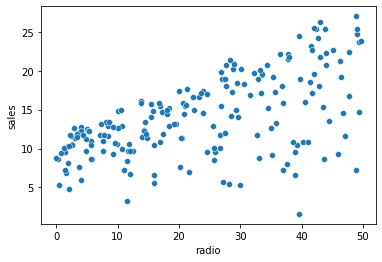

In [12]:
# Let's see the scatter-plot of "radio" column vs the target variable.
sns.scatterplot(x=df["radio"],y=df["sales"])

# There seems to be a linear relation with some noise.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

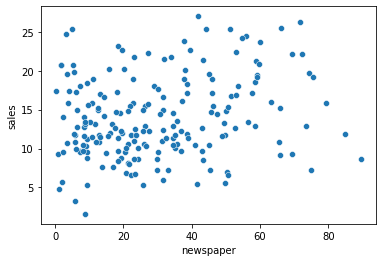

In [13]:
# Let's see the scatter-plot of "newspaper" column vs the target variable.
sns.scatterplot(x=df["newspaper"],y=df["sales"])

# nothing specific can be told about the relation between them from the plot. 
# The correlation coefficient of "newspaper" column needs to be checked to see if the relation is statistically significant. 

<AxesSubplot:>

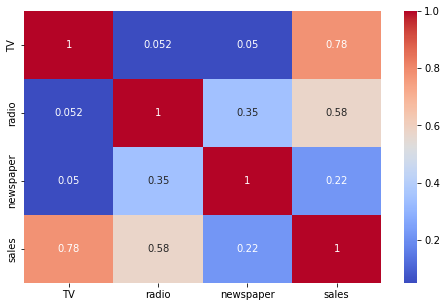

In [14]:
# Let's plot the heat-map of correlation among the columns.
corr= df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [15]:
# Let's check the relation of our feature columns with our target variable.
corr["sales"]

# since the value of "newspaper" doesn't seem to be insignificant. Hence let's keep the column for further analysis.

TV           0.779121
radio        0.576748
newspaper    0.219555
sales        1.000000
Name: sales, dtype: float64

In [52]:
# Let's check the skewness in our data.
df.skew()

# newspaper column seems to have skewness.

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [16]:
# Let's apply power-transformation on the "newspaper" column.
from sklearn.preprocessing import PowerTransformer

pt= PowerTransformer(method="box-cox")
df["newspaper"]= pt.fit_transform(df[["newspaper"]])

In [17]:
# let's check skewness now
df.skew()

# skewsness of "newspaper" column have come down to an acceptable level.

TV          -0.082332
radio        0.114842
newspaper   -0.117312
sales        0.407130
dtype: float64

In [18]:
# Separating target variable and features.
X= df.drop(columns=["sales"])
y= df["sales"]

In [19]:
# Scaling the data using Standard-Scaler.
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [20]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# All values seems to be under acceptable level.

        vif   Features
0  1.003260         TV
1  1.098161      radio
2  1.096756  newspaper


In [22]:
############################################## LINEAR REGRESSION #############################################################

from sklearn.linear_model import LinearRegression

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i)

    lr= LinearRegression()
    lr.fit(x_train,y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 88.1
Testing Score for sample 0 : 91.94
Mean Absolute Error 1.26
Root Mean Squared Error 1.63


Training Score for sample 1 : 89.13
Testing Score for sample 1 : 90.19
Mean Absolute Error 1.12
Root Mean Squared Error 1.55


Training Score for sample 2 : 91.4
Testing Score for sample 2 : 84.29
Mean Absolute Error 1.49
Root Mean Squared Error 2.19


Training Score for sample 3 : 88.6
Testing Score for sample 3 : 91.46
Mean Absolute Error 1.32
Root Mean Squared Error 1.65


Training Score for sample 4 : 90.03
Testing Score for sample 4 : 86.25
Mean Absolute Error 1.23
Root Mean Squared Error 1.58


Training Score for sample 5 : 90.01
Testing Score for sample 5 : 86.64
Mean Absolute Error 1.41
Root Mean Squared Error 1.76


Training Score for sample 6 : 89.38
Testing Score for sample 6 : 89.38
Mean Absolute Error 1.26
Root Mean Squared Error 1.85


Training Score for sample 7 : 89.14
Testing Score for sample 7 : 90.23
Mean Absolute Error 1.38
Root Mean Squared 

In [23]:
############################################## ADABOOST REGRESSION #############################################################

from sklearn.ensemble import AdaBoostRegressor

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i)

    ada = AdaBoostRegressor()
    ada.fit(x_train, y_train)

    y_pred_train = ada.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= ada.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 97.75
Testing Score for sample 0 : 96.34
Mean Absolute Error 0.89
Root Mean Squared Error 1.1


Training Score for sample 1 : 97.67
Testing Score for sample 1 : 96.1
Mean Absolute Error 0.82
Root Mean Squared Error 0.98


Training Score for sample 2 : 97.92
Testing Score for sample 2 : 95.05
Mean Absolute Error 0.99
Root Mean Squared Error 1.23


Training Score for sample 3 : 97.46
Testing Score for sample 3 : 95.48
Mean Absolute Error 0.97
Root Mean Squared Error 1.2


Training Score for sample 4 : 97.63
Testing Score for sample 4 : 93.8
Mean Absolute Error 0.84
Root Mean Squared Error 1.06


Training Score for sample 5 : 97.79
Testing Score for sample 5 : 96.8
Mean Absolute Error 0.67
Root Mean Squared Error 0.86


Training Score for sample 6 : 97.32
Testing Score for sample 6 : 95.06
Mean Absolute Error 0.99
Root Mean Squared Error 1.26


Training Score for sample 7 : 98.01
Testing Score for sample 7 : 96.54
Mean Absolute Error 0.8
Root Mean Squared Err

In [32]:
############################################## RANDOM-FORESTS REGRESSION #######################################################

from sklearn.ensemble import RandomForestRegressor

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i)

    rf= RandomForestRegressor()
    rf.fit(x_train,y_train)

    y_pred_train = rf.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= rf.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 99.5
Testing Score for sample 0 : 97.98
Mean Absolute Error 0.64
Root Mean Squared Error 0.81


Training Score for sample 1 : 99.59
Testing Score for sample 1 : 98.25
Mean Absolute Error 0.55
Root Mean Squared Error 0.66


Training Score for sample 2 : 99.67
Testing Score for sample 2 : 96.97
Mean Absolute Error 0.71
Root Mean Squared Error 0.96


Training Score for sample 3 : 99.53
Testing Score for sample 3 : 97.45
Mean Absolute Error 0.72
Root Mean Squared Error 0.9


Training Score for sample 4 : 99.63
Testing Score for sample 4 : 97.31
Mean Absolute Error 0.54
Root Mean Squared Error 0.7


Training Score for sample 5 : 99.64
Testing Score for sample 5 : 97.89
Mean Absolute Error 0.55
Root Mean Squared Error 0.7


Training Score for sample 6 : 99.6
Testing Score for sample 6 : 97.09
Mean Absolute Error 0.66
Root Mean Squared Error 0.97


Training Score for sample 7 : 99.6
Testing Score for sample 7 : 98.13
Mean Absolute Error 0.56
Root Mean Squared Err

In [ ]:
# Random-forests seems to be giving the best results. Let's try to tune it further.

In [33]:
# Hyperparameter tuning of Random forest regression.

from sklearn.model_selection import GridSearchCV

params= {"n_estimators": np.arange(50,300,50),
         "max_depth": range(6,10),
         "min_samples_split": range(2,4)
         }

grd= GridSearchCV(rf, param_grid=params,cv=5,n_jobs=-1)

grd.fit(x_train,y_train)
print(grd.best_params_)

{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
# Taking the best sample split result and applying on the random-forests tuned model.

rf_tuned= grd.best_estimator_
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=1)

y_pred_train = rf_tuned.predict(x_train)
accuracy_train = r2_score(y_train,y_pred_train)
y_pred= rf_tuned.predict(x_test)
accuracy_test = r2_score(y_test,y_pred)

print("Training Score for best sample",round(accuracy_train*100,2))
print("Testing Score for best sample:",round(accuracy_test*100,2))
print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

Training Score for best sample 99.41
Testing Score for best sample: 99.01
Mean Absolute Error 0.37
Root Mean Squared Error 0.49


In [35]:
# cross-validating the tuned random-forest regression model.

from sklearn.model_selection import cross_val_score, KFold

for i in range(5,10):
    cv_score= cross_val_score(rf_tuned,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 97.45
the cv score for 6 fold: 97.66
the cv score for 7 fold: 97.54
the cv score for 8 fold: 97.77
the cv score for 9 fold: 97.77


In [36]:
# cross-validating the linear regression model.

from sklearn.model_selection import cross_val_score, KFold

for i in range(5,10):
    cv_score= cross_val_score(lr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 88.58
the cv score for 6 fold: 88.69
the cv score for 7 fold: 88.41
the cv score for 8 fold: 88.83
the cv score for 9 fold: 88.13


In [37]:
# cross-validating the adaboost regression model.

from sklearn.model_selection import cross_val_score, KFold

for i in range(5,10):
    cv_score= cross_val_score(ada,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 95.7
the cv score for 6 fold: 95.68
the cv score for 7 fold: 95.57
the cv score for 8 fold: 95.23
the cv score for 9 fold: 95.59


In [38]:
# saving the model using pickle
import pickle 

Advertising= "Advertising_model.pickle"
pickle.dump(rf_tuned, open(Advertising,'wb'))